In [14]:
from descriptive_statistics import DiabetesDataBase
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from utils import validate

## Hyperparameters

In [15]:
RANDOM_STATE = 17
SCALER = StandardScaler()

In [16]:
csv_path = "diabetes.csv"
ddb = DiabetesDataBase(csv_path, train_split=0.8, val_split=0.1, test_split=0.1, random_state=RANDOM_STATE, augment=True)
X_train, X_val, X_test, y_train, y_val, y_test = ddb.get_splits()

## KNN

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        53
           1       0.48      0.62      0.54        21

    accuracy                           0.70        74
   macro avg       0.66      0.68      0.66        74
weighted avg       0.73      0.70      0.71        74



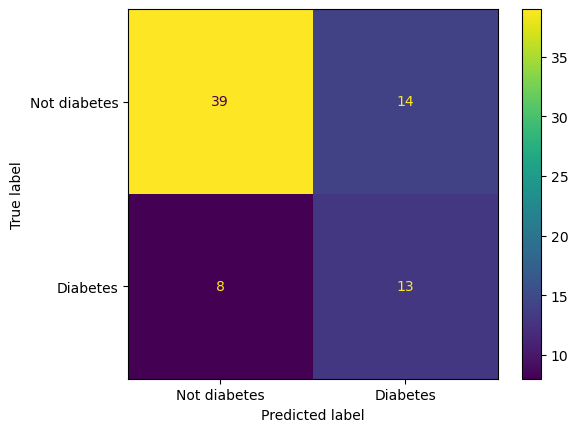

In [17]:
knn = KNeighborsClassifier(n_neighbors=1, metric="manhattan")

pipe = Pipeline(steps=[
                ("scaler", SCALER), 
                ("classifier", knn)
            ])
pipe.fit(X_train, y_train)
            
knn_avg, knn_cm = validate(pipe, X_test, y_test)

## Random Forest

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        53
           1       0.50      0.62      0.55        21

    accuracy                           0.72        74
   macro avg       0.67      0.69      0.67        74
weighted avg       0.74      0.72      0.72        74



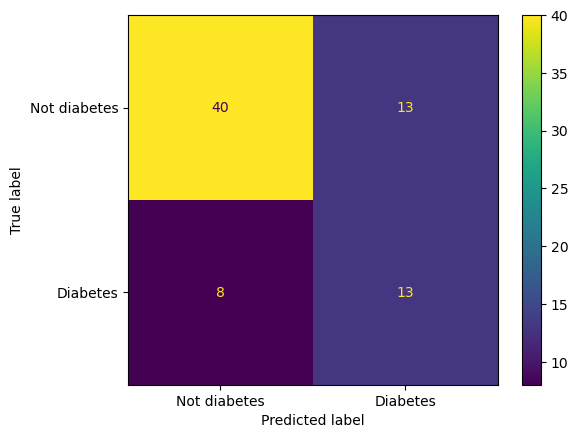

In [19]:
random_forest = RandomForestClassifier(
                                       bootstrap=False,
                                       max_depth=80,
                                       max_features='log2',
                                       min_samples_leaf=2,
                                       min_samples_split=10,
                                       n_estimators=1788)

pipe = Pipeline(steps=[
                ("scaler", SCALER), 
                ("classifier", random_forest)
            ])
pipe.fit(X_train, y_train)
            
random_forest_avg, random_forest_cm = validate(pipe, X_test, y_test)